In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 150)
import os
import gc
gc.enable()
import time
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from scipy import stats
%matplotlib inline
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')
import urllib        #for url stuff

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast


from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

import seaborn as sns #for making plots
import matplotlib.pyplot as plt # for plotting
import os  # for os commands

import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()


Loading BokehJS ...

In [2]:
## Common Variables for Notebook 
ROOT = '/kaggle/input/nlp-getting-started/'

## load the data 
df_train = pd.read_csv(ROOT+'train.csv')
df_test = pd.read_csv(ROOT+'test.csv')
df_sub = pd.read_csv(ROOT+'sample_submission.csv')

# First look at the data

In [3]:
#Looking data format and types
print(df_train.info())
print(df_test.info())
print(df_sub.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
id          3263 non-null int64
keyword     3237 non-null object
location    2158 non-null object
text        3263 non-null object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
id        3263 non-null int64
target    3263 non-null int64
dtypes: int64(2)
memory usage: 51.1 KB
None


In [4]:
#Some Statistics
df_train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [5]:
#Take a look at the data
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# Exploring the data:

# Let's check target distrubution

# Check for Class Imbalance

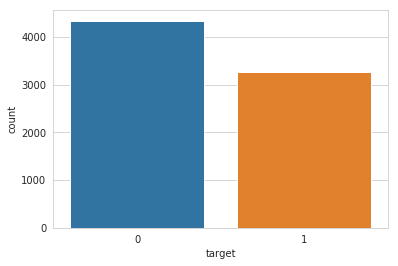

In [6]:
target = df_train['target']
sns.set_style('whitegrid')
sns.countplot(target)

# Check Text Content

In [7]:
df_train["text"].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

### It's clear that the rest of the texts are hided because of the test length, I will put the column in a list to check the first 5 texts

In [8]:
#To check the text content we can use a list
df_train["text"].tolist()[:5]

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ']

### Let's make it more perfect

In [9]:
t = df_train["text"].to_list()
for i in range(5):
    print('Tweet Number '+str(i+1)+': '+t[i])

Tweet Number 1: Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Tweet Number 2: Forest fire near La Ronge Sask. Canada
Tweet Number 3: All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
Tweet Number 4: 13,000 people receive #wildfires evacuation orders in California 
Tweet Number 5: Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 


## I will be back to text analysis after

# Tweets Locations

In [10]:
l = df_train["location"].to_list()
print('There is '+ str(len(set(l)))+" different loction")

There is 3342 different loction


## There is 3342 different loction from which the tweets have been posted

# Count Locations

# Top 20 Posting Locations

In [11]:
df_train['location'].value_counts().head(n=20)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
Everywhere          15
New York, NY        15
California, USA     15
United Kingdom      14
Name: location, dtype: int64

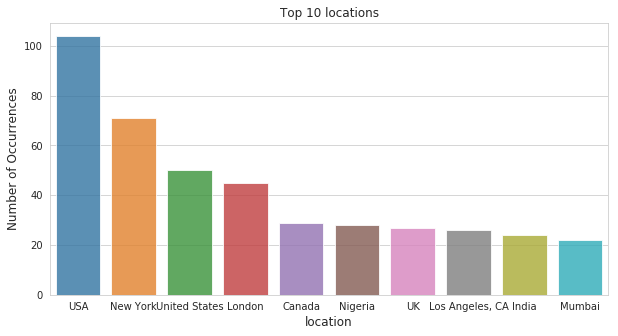

In [12]:
# Plotting a bar graph of the number of tweets in each location, for the first ten locations listed
# in the column 'location'
location_count  = df_train['location'].value_counts()
location_count = location_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(location_count.index, location_count.values, alpha=0.8)
plt.title('Top 10 locations')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('location', fontsize=12)
plt.show()


# What about test data?

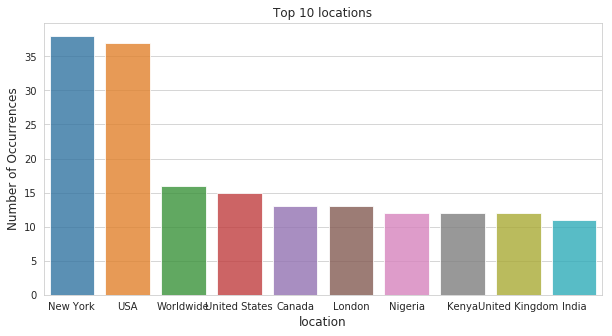

In [13]:
# Plotting a bar graph of the number of tweets in each location, for the first ten locations listed
# in the column 'location'
location_count  = df_test['location'].value_counts()
location_count = location_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(location_count.index, location_count.values, alpha=0.8)
plt.title('Top 10 locations')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('location', fontsize=12)
plt.show()


## I think there is not a big difference in location between train data and test data

# t-Distributed Stochastic Neighbor Embedding (tsne) to check Dimentionality Reduction (Location)

### Label Encoding location column

In [14]:
df = df_train[df_train['location'].notnull()]

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['location'] = le.fit_transform(df.location.values)

In [16]:
# tsne code from this great kernel: https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
# New_df is from the random undersample data (fewer instances)
X = df['location']
y = df['target']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values.reshape(-1, 1))
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 3.6e+01 s


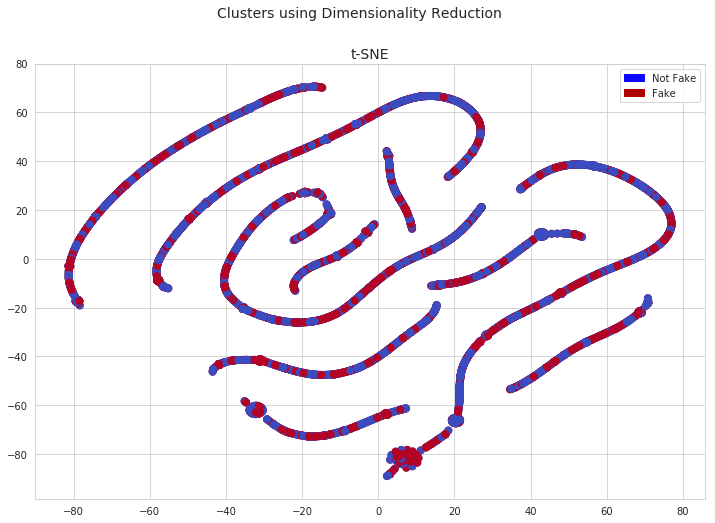

In [17]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,8))
# labels = ['Not Fake', 'Fake']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Not Fake')
red_patch = mpatches.Patch(color='#AF0000', label='Fake')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Not Fake', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fake', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


plt.show()

# Now let's check keywords

# Count keyword

# Top 20 keywords

In [18]:
df_train['keyword'].value_counts().head(n=20)

fatalities     45
deluge         42
armageddon     42
sinking        41
harm           41
damage         41
body%20bags    41
collided       40
evacuate       40
fear           40
twister        40
windstorm      40
siren          40
outbreak       40
weapon         39
whirlwind      39
flames         39
weapons        39
wrecked        39
derailment     39
Name: keyword, dtype: int64

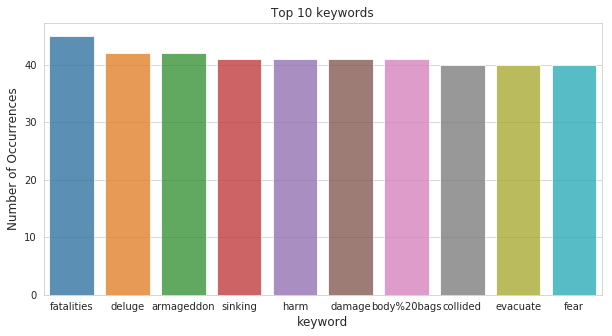

In [19]:
keyword_count  = df_train['keyword'].value_counts()
keyword_count = keyword_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(keyword_count.index, keyword_count.values, alpha=0.8)
plt.title('Top 10 keywords')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('keyword', fontsize=12)
plt.show()


## So again, what about test data?

In [20]:
df_test['keyword'].value_counts().head(n=20)

deluged               23
demolished            22
rubble                22
first%20responders    21
annihilation          21
seismic               21
sirens                21
snowstorm             21
obliteration          21
survivors             20
avalanche             20
mayhem                20
catastrophic          20
dead                  20
bioterrorism          20
wild%20fires          19
obliterated           19
crushed               19
trauma                19
hostage               19
Name: keyword, dtype: int64

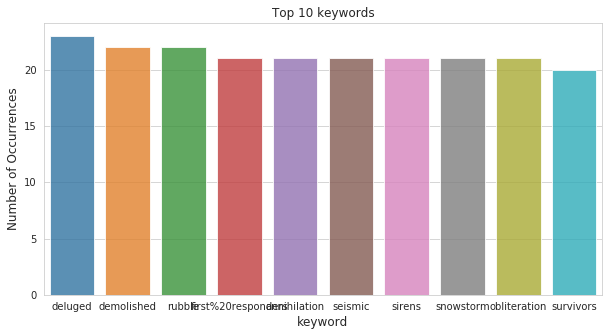

In [21]:
keyword_count  = df_test['keyword'].value_counts()
keyword_count = keyword_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(keyword_count.index, keyword_count.values, alpha=0.8)
plt.title('Top 10 keywords')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('keyword', fontsize=12)
plt.show()


## There is a little difference between keywords in train set and test set, so I will check the intersection between the keywrds in train and test

In [22]:
keyword_train  = list(set(df_train['keyword']))
keyword_test  = list(set(df_test['keyword']))

print(len(keyword_train))
print(len(keyword_test))

222
222


### There is 222 unique values in both train and test sets

## Intersection

In [23]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

len(intersection(keyword_train, keyword_test))

222

## The intersection between the two datasets give us the same number of unique keywords, so the keywords used in both datasets with different occurrence

# t-Distributed Stochastic Neighbor Embedding (tsne) to check Dimentionality Reduction (Keywors)

In [24]:
df = df_train[df_train['keyword'].notnull()]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['keyword'] = le.fit_transform(df.keyword.values)

In [25]:
# tsne code from this great kernel: https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets
# New_df is from the random undersample data (fewer instances)
X = df['keyword']
y = df['target']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values.reshape(-1, 1))
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

T-SNE took 3.3e+01 s


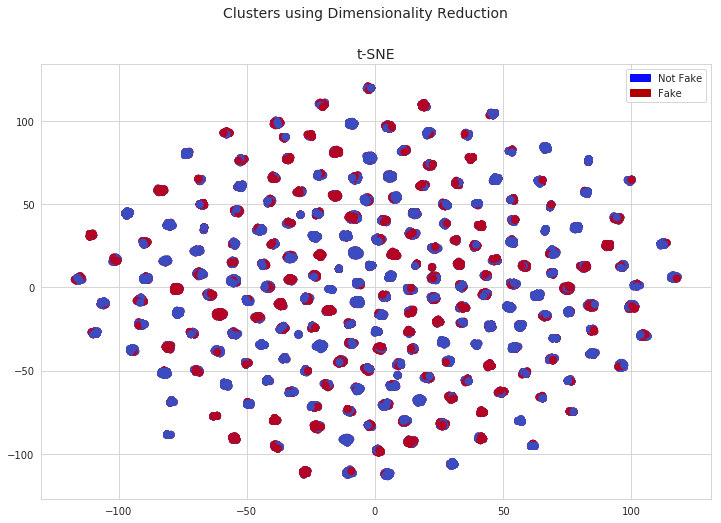

In [26]:
f, (ax1) = plt.subplots(1, 1, figsize=(12,8))
# labels = ['Not Fake', 'Fake']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Not Fake')
red_patch = mpatches.Patch(color='#AF0000', label='Fake')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Not Fake', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fake', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


plt.show()

### We can see some clearly blue dots which represent real events

# Let's do some text analysis

### I want to check if there is some duplicated tweets, it could be a retweet. If we know that a tweet is fake or not so the other duplicated tweets will get the same class

In [27]:
len(set(df_train['text']))

7503

### With a hard mathemitical computing we can know that there is 7613-7503=110 tweets which are duplicated :D

## Let's do the same for test set

In [28]:
len(set(df_test['text']))

3243

### There is 20 duplicated tweets in the test data

# Topic Modeling

### I thinks it's very important to do topic modeling and understand the content of each question and answer. The reason is that there is some question out of meaning and are not related to the category so they will get little answer and sometimes some blaming

## So we will start with some Topic Modeling Algorithms

## Latent Dirichlet Allocation (LDA)

#### Topic modeling is a type of statistical modeling for discovering the abstract “topics” that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an example of topic model and is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions.

### Here we are going to apply LDA to the tweets and split them into topics. 

## Let’s get started!

In [29]:
html_tags = ['<P>', '</P>', '<Table>', '</Table>', '<Tr>', '</Tr>', '<Ul>', '<Ol>', '<Dl>', '</Ul>', '</Ol>', \
             '</Dl>', '<Li>', '<Dd>', '<Dt>', '</Li>', '</Dd>', '</Dt>']
r_buf = ['It', 'is', 'are', 'do', 'does', 'did', 'was', 'were', 'will', 'can', 'the', 'a', 'of', 'in', 'and', 'on', \
         'what', 'where', 'when', 'which'] + html_tags

def clean(x):
    x = x.lower()
    for r in r_buf:
        x = x.replace(r, '')
    x = re.sub(' +', ' ', x)
    return x

bin_question_tokens = ['it', 'is', 'are', 'do', 'does', 'did', 'was', 'were', 'will', 'can']
stop_words = text.ENGLISH_STOP_WORDS.union(["book"])

def predict(json_data, annotated=False):
    # Parse JSON data
    candidates = json_data['long_answer_candidates']
    candidates = [c for c in candidates if c['top_level'] == True]
    doc_tokenized = json_data['document_text'].split(' ')
    question = json_data['question_text']
    question_s = question.split(' ') 
    if annotated:
        ann = json_data['annotations'][0]

    # TFIDF for the document
    tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words=stop_words)
    tfidf.fit([json_data['document_text']])
    q_tfidf = tfidf.transform([question]).todense()

    # Find the nearest answer from candidates
    distances = []
    scores = []
    i_ann = -1
    for i, c in enumerate(candidates):
        s, e = c['start_token'], c['end_token']
        t = ' '.join(doc_tokenized[s:e])
        distances.append(levenshtein_distance(clean(question), clean(t)))
        
        t_tfidf = tfidf.transform([t]).todense()
        score = 1 - spatial.distance.cosine(q_tfidf, t_tfidf)
        
#         score = 0
        
#         for w in doc_tokenized[s:e]:
#             if w in q_s:
#                 score += 0.1

        scores.append(score)

    # Format results
#     ans = candidates[np.argmin(distances)]
    ans = candidates[np.argmax(scores)]
    if np.max(scores) < 0.2:
        ans_long = '-1:-1'
    else:
        ans_long = str(ans['start_token']) + ':' + str(ans['end_token'])
    if question_s[0] in bin_question_tokens:
        ans_short = 'YES'
    else:
        ans_short = ''
        
    # Preparing data for debug
    if annotated:
        ann_long_text = ' '.join(doc_tokenized[ann['long_answer']['start_token']:ann['long_answer']['end_token']])
        if ann['yes_no_answer'] == 'NONE':
            if len(json_data['annotations'][0]['short_answers']) > 0:
                ann_short_text = ' '.join(doc_tokenized[ann['short_answers'][0]['start_token']:ann['short_answers'][0]['end_token']])
            else:
                ann_short_text = ''
        else:
            ann_short_text = ann['yes_no_answer']
    else:
        ann_long_text = ''
        ann_short_text = ''
        
    ans_long_text = ' '.join(doc_tokenized[ans['start_token']:ans['end_token']])
    if len(ans_short) > 0 or ans_short == 'YES':
        ans_short_text = ans_short
    else:
        ans_short_text = '' # Fix when short answers will work
                    
    return ans_long, ans_short, question, ann_long_text, ann_short_text, ans_long_text, ans_short

In [30]:
reindexed_data = df_train['text'] #.str.decode("utf-8", errors="ignore")

In [31]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii',errors="ignore").decode('utf-8',errors="ignore") for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

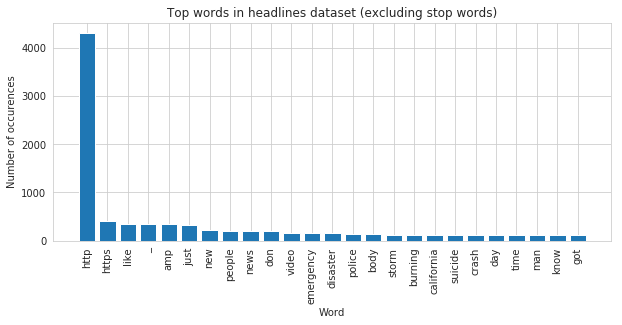

In [32]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

## Next we generate a histogram of headline word lengths, and use part-of-speech tagging to understand the types of words used across the corpus. This requires first converting all headline strings to TextBlobs and calling the pos_tags method on each, yielding a list of tagged words for each headline.

In [33]:
tagged_headlines = [TextBlob(reindexed_data[i]).pos_tags for i in range(reindexed_data.shape[0])]

In [34]:
tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})

word_counts = [] 
pos_counts = {}

for headline in tagged_headlines_df[u'tags']:
    word_counts.append(len(headline))
    for tag in headline:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per tweet: ', np.mean(word_counts))

Total number of words:  122690
Mean number of words per tweet:  16.11585445947721


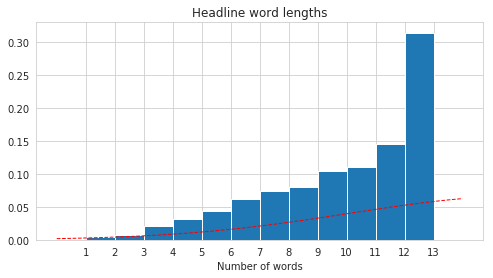

In [35]:
y = stats.norm.pdf(np.linspace(0,14,50), np.mean(word_counts), np.std(word_counts))

fig, ax = plt.subplots(figsize=(8,4))
ax.hist(word_counts, bins=range(1,14), density=True);
ax.plot(np.linspace(0,14,50), y, 'r--', linewidth=1);
ax.set_title('Headline word lengths');
ax.set_xticks(range(1,14));
ax.set_xlabel('Number of words');
plt.show()

# Part-of-Speech Tagging for questions Corpus

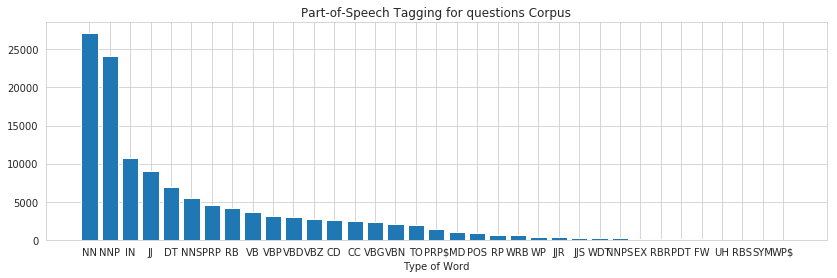

In [36]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(14,4))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for questions Corpus');
ax.set_xlabel('Type of Word');

# Topic Modelling

#### Now we will apply a clustering algorithm to the headlines corpus in order to study the topic, as well as how it has evolved through time. To do so, we first experiment with a small subsample of the dataset in order to determine which of the two potential clustering algorithms is most appropriate – once this has been ascertained, we then scale up to a larger portion of the available data.

## Preprocessing

#### The only preprocessing step required in our case is feature construction, where we take the sample of text tweets and represent them in some tractable feature space. In practice, this simply means converting each string to a numerical vector. This can be done using the CountVectorizer object from SKLearn, which yields an  n×K  document-term matrix where  K  is the number of distinct words across the  n  headlines in our sample (less stop words and with a limit of max_features).

In [37]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=40000)
small_text_sample = reindexed_data.sample(n=500, random_state=0).values

print('Tweets before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Tweets after vectorization: \n{}'.format(small_document_term_matrix[123]))

Tweets before vectorization: NowPlaying Rock You Like A Hurricane - Scorpions http://t.co/JRztpT8IJq
Tweets after vectorization: 
  (0, 1315)	1
  (0, 1564)	1
  (0, 1328)	1
  (0, 2263)	1
  (0, 1841)	1
  (0, 2339)	1
  (0, 1447)	1


### Thus we have our (very high-rank and sparse) training data, small_document_term_matrix, and can now actually implement a clustering algorithm. Our choice will be either Latent Semantic Analysis or Latent Dirichilet Allocation. Both will take our document-term matrix as input and yield an  n×N  topic matrix as output, where  N  is the number of topic categories (which we supply as a parameter). For the moment, we shall take this to be 5 like categories number.

In [38]:
#number of topics
n_topics = 5

# Latent Semantic Analysis (LSA)

## Let's start by experimenting with LSA. This is effectively just a truncated singular value decomposition of a (very high-rank and sparse) document-term matrix, with only the  r= n_topics largest singular values preserved.

In [39]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [40]:
# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [41]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [42]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word.encode('ascii',errors="ignore").decode('utf-8',errors="ignore"))
        top_words.append(" ".join(topic_words))         
    return top_words

In [43]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  http _ new police news storm set accident people wildfire
Topic 2:  https like amp don man day good think _ body
Topic 3:  people suicide saudi mosque http bomber want bombing kills news
Topic 4:  just twitter love got fear armageddon im survive twister bomb
Topic 5:  al zabadani brisk mph wounds minutes pace burned doing myfitnesspal


### Thus we have converted our initial small sample of headlines into a list of predicted topic categories, where each category is characterised by its most frequent words. The relative magnitudes of each of these categories can then be easily visualised though use of a bar chart.



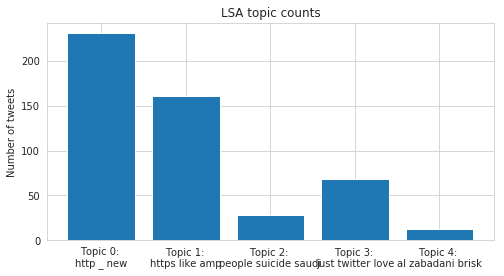

In [44]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of tweets');
ax.set_title('LSA topic counts');
plt.show()

#### However, this does not provide a great point of comparison with other clustering algorithms. In order to properly contrast LSA with LDA we instead use a dimensionality-reduction technique called  *t*-SNE, which will also serve to better illuminate the success of the clustering process.

In [45]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.050819
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.435917
[t-SNE] KL divergence after 2000 iterations: 0.226084


#### Now that we have reduced these n_topics-dimensional vectors to two-dimensional representations, we can then plot the clusters using Bokeh. Before doing so however, it will be useful to derive the centroid location of each topic, so as to better contextualise our visualisation.

In [46]:
# Define helper functions
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [47]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

### All that remains is to plot the clustered questions. Also included are the top three words in each cluster, which are placed

In [48]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

### Evidently, this is a bit a of a failed result. We have failed to reach any great degree of separation across the topic categories, and it is difficult to tell whether this can be attributed to the LSA decomposition or instead the  t -SNE dimensionality reduction process. Let's move forward and try another clustering method

# Latent Dirichilet Allocation (LDA)

### We now repeat this process using LDA instead of LSA. LDA is instead a generative probabilistic process, designed with the specific goal of uncovering latent topic structure in text corpora.

In [49]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [50]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [51]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  http police just accident https world car black killed avalanche
Topic 2:  http news _ new suicide saudi set mosque life bomber
Topic 3:  http https people like amp disaster want storm look rt
Topic 4:  http like amp airplane accident man emergency drought fires _
Topic 5:  http just don love got new like day fatalities burned


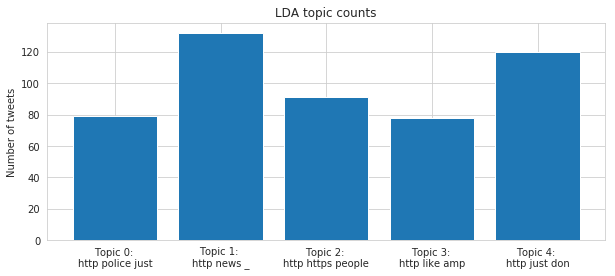

In [52]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(10,4))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of tweets');

## However, in order to properly compare LDA with LSA, we again take this topic matrix and project it into two dimensions.

In [53]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 500 samples in 0.001s...
[t-SNE] Computed neighbors for 500 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 500 / 500
[t-SNE] Mean sigma: 0.015812
[t-SNE] KL divergence after 250 iterations with early exaggeration: 38.578480
[t-SNE] KL divergence after 2000 iterations: 0.035242


In [54]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=600, plot_height=600)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

### This is a much better result! Controlling for  t -SNE, it would seem that LDA has had much more succcess than LSA in separating out the topic categories. For this reason, LDA appears the more appropriate algorithm when we scale up the clustering process.

# LDA with an other way of visualisation

In [55]:
# Preparing a corpus for analysis and checking the first 5 entries
corpus=[]

corpus = df_train['text'].to_list()

corpus[:5]

['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all',
 'Forest fire near La Ronge Sask. Canada',
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 '13,000 people receive #wildfires evacuation orders in California ',
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ']

In [56]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/tmp" will be used to save temporary dictionary and corpus.


In [57]:
# removing common words and tokenizing
# google-quest-challenge
stoplist = stopwords.words('english') + list(punctuation) + list("([)]?") + [")?"]

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'tweets.dict'))  # store the dictionary

In [58]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'tweets.mm'), corpus) 

## In the previous cells, I created a corpus of documents represented as a stream of vectors. To continue, lets use that corpus, with the help of Gensim.

#### Gensim is an open-source library for unsupervised topic modeling and natural language processing, using modern statistical machine learning. Gensim is implemented in Python and Cython. Wikipedia

# Creating a transformation

### The transformations are standard Python objects, typically initialized by means of a training corpus:

### Different transformations may require different initialization parameters; in case of TfIdf, the “training” consists simply of going through the supplied corpus once and computing document frequencies of all its features. Training other models, such as Latent Semantic Analysis or Latent Dirichlet Allocation

In [59]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

In [60]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

# LDA:

### Latent Dirichlet Allocation, LDA is yet another transformation from bag-of-words counts into a topic space of lower dimensionality. LDA is a probabilistic extension of LSA (also called multinomial PCA), so LDA’s topics can be interpreted as probability distributions over words. These distributions are, just like with LSA, inferred automatically from a training corpus. Documents are in turn interpreted as a (soft) mixture of these topics (again, just like with LSA).

In [61]:
#I will try 10 topics
total_topics = 10

lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tf

## Show first n important word in the topics

In [62]:
lda.show_topics(total_topics,5)

[(0,
  '0.010*"new" + 0.010*"officer" + 0.008*"hollywood" + 0.007*"typhoon" + 0.007*"&amp;"'),
 (1,
  '0.011*"mh370:" + 0.010*"malaysia" + 0.010*"#news" + 0.008*"pm:" + 0.006*"caused"'),
 (2,
  '0.011*"failure" + 0.010*"pkk" + 0.010*"wildfire" + 0.010*"tragedy" + 0.008*"turkey"'),
 (3,
  '0.024*"i\'m" + 0.011*"families" + 0.010*"released" + 0.010*"like" + 0.009*"get"'),
 (4,
  '0.015*"suicide" + 0.012*"&amp;" + 0.012*"saudi" + 0.012*"smoke" + 0.011*"weapon"'),
 (5,
  '0.018*"storm" + 0.017*"disaster" + 0.012*"obama" + 0.011*"violent" + 0.010*"northern"'),
 (6,
  '0.016*"suicide" + 0.013*"like" + 0.012*"video" + 0.009*"trauma" + 0.007*"@youtube"'),
 (7,
  '0.011*"sinking" + 0.008*"weapons" + 0.007*"3" + 0.007*"killed" + 0.006*"??"'),
 (8,
  '0.014*"wounded" + 0.010*"severe" + 0.007*"warning" + 0.007*"weather" + 0.007*"??"'),
 (9,
  '0.013*"trapped" + 0.012*"fire" + 0.009*"forest" + 0.008*"oil" + 0.008*"wild"')]

In [63]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}

In [64]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(10, 214)


In [65]:
df_lda

,new,officer,hollywood,typhoon,&amp;,sirens,soudelor,affected,fear,via,survived,suicide,national,waves,state,wild,2,send,four,evacuate,life,attack,im,11,horrible,...,move,take,school,someone,let,start,trapped,fire,forest,oil,security,u,hope,fires,terrorism,site,rt,bigger,memories,called,way,injuries,human,tablet,ur
0,0.010334,0.010154,0.007885,0.00686,0.006628,0.006192,0.006158,0.006073,0.005913,0.005335,0.004839,0.004657,0.004606,0.004596,0.004595,0.004548,0.004466,0.004457,0.004141,0.004045,0.003973,0.003931,0.003853,0.003847,0.003728,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005914,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.00000,0.006249,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004850,0.000000,0.000000,0.00000,0.011871,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.004313,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.00000,0.003594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016425,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.00000,0.000000,0.000

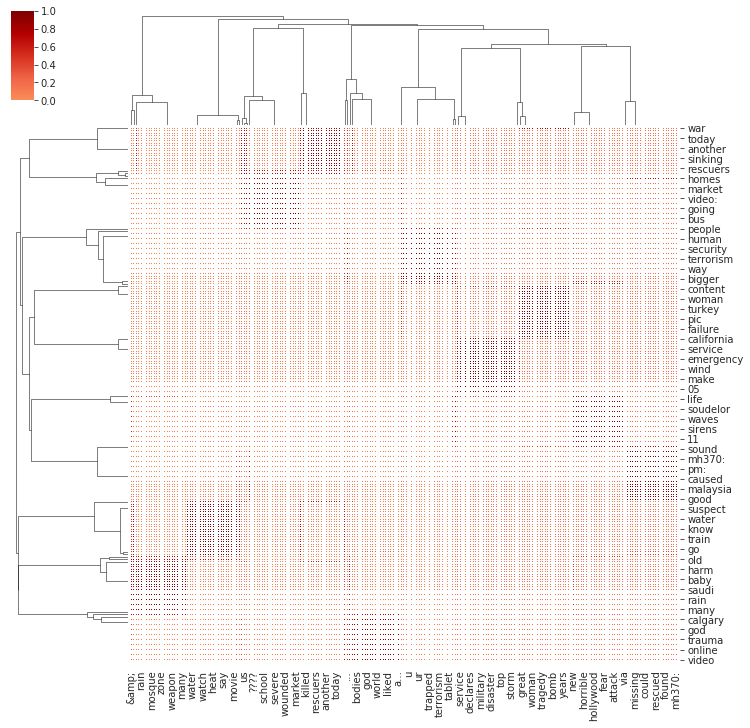

In [66]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="OrRd", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [67]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
7     -207.885483  -37.759239       1        1  40.558605
9      -46.923908 -187.323914       2        1  18.835983
8      -34.890812  -93.897644       3        1   5.371784
4     -132.408035   50.640015       4        1   5.033955
6      -22.143719   87.508392       5        1   5.033497
0     -147.434937 -145.791901       6        1   5.033295
3       56.223064 -117.786850       7        1   5.033290
1     -116.815559  -53.933300       8        1   5.033274
5       55.329021   -9.026167       9        1   5.033248
2      -41.325119   -2.972688      10        1   5.033070, topic_info=     Category       Freq       Term      Total  loglift  logprob
7770  Default  18.000000    trapped  18.000000  30.0000  30.0000
62    Default  14.000000        i'm  14.000000  29.0000  29.0000
6076  Default  33.000000    sinking  33.000000  28.0000  28.0000
2482  Default  13.000000    suicide  13.000000  27.0000  27.0000
140   Default  42.000000       like  42.000000  26.0000  26.0000
...       ...        ...        ...        ...      ...      ...
2125  Topic10   1.838492        war  18.750221   0.6669  -5.3395
5429  Topic10   1.395334  hiroshima   6.223997   1.4939  -5.6153
1470  Topic10   1.277736      world   5.990368   1.4441  -5.7034
914   Topic10   1.307426        via  20.866905   0.2190  -5.6804
28    Topic10   1.301817     people  22.438869   0.1421  -5.6847

[584 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
4534       1  0.955634          #??
9141      10  1.549204         #art
12383      7  1.513615         #cnn
0          1  1.034961  #earthquake
14271      9  0.600141       #islam
...      ...       ...          ...
283       10  0.393713        years
9553       4  0.876073         zone
1565       3  1.267270        zone.
200        1  0.349195          ûò
200        8  0.349195          ûò

[797 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 9, 5, 7, 1, 4, 2, 6, 3])

# Please don't forget to upvote!

# To be continued